In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df=pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df2=df.copy()

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
columns_with_zeroes = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [ ]:
df2[columns_with_zeroes]=df2[columns_with_zeroes].replace(0,np.nan)

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df2[columns_with_zeroes]=df2[columns_with_zeroes].fillna(df2[columns_with_zeroes].median())

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df2.duplicated().sum()

np.int64(0)

In [ ]:
df2.dtypes

,0
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
plausible_ranges = {
    'Glucose': (40, 300),
    'BloodPressure': (30, 200),
    'BMI': (15, 70),
    'Insulin': (10, 900),
    'Age': (18, 100)
}

In [ ]:
plausible_ranges.items()


dict_items([('Glucose', (40, 300)), ('BloodPressure', (30, 200)), ('BMI', (15, 70)), ('Insulin', (10, 900)), ('Age', (18, 100))])

In [ ]:
for col, (low, high) in plausible_ranges.items():
    invalid_count = df2[(df2[col] < low) | (df2[col] > high)].shape[0]
    print(f"{col}: {invalid_count} values outside plausible range")

Glucose: 0 values outside plausible range
BloodPressure: 1 values outside plausible range
BMI: 0 values outside plausible range
Insulin: 0 values outside plausible range
Age: 0 values outside plausible range


In [ ]:
df2[df2['BloodPressure'] < 30]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
597,1,89.0,24.0,19.0,25.0,27.8,0.559,21,0


In [ ]:
df2[df2['BloodPressure'] > 200]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
median_bp = df2['BloodPressure'].median()
df2.loc[597, 'BloodPressure'] = median_bp

In [ ]:
df2.loc[597]

,597
Pregnancies,1.000
Glucose,89.000
BloodPressure,72.000
SkinThickness,19.000
Insulin,25.000
BMI,27.800
DiabetesPedigreeFunction,0.559
Age,21.000
Outcome,0.000


In [ ]:
df2['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


In [ ]:
df2.groupby('Outcome')[['Glucose', 'BMI', 'Age', 'Insulin']].mean()


,Glucose,BMI,Age,Insulin
Outcome,,,,
0,110.682000,30.885600,31.190000,127.792000
1,142.130597,35.383582,37.067164,164.701493


In [ ]:
df2[['Glucose','BMI','Age','Insulin','Outcome','Pregnancies','BloodPressure','SkinThickness','DiabetesPedigreeFunction']].corr()


,Glucose,BMI,Age,Insulin,Outcome,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction
Glucose,1.000000,0.231049,0.266909,0.419451,0.492782,0.128213,0.215651,0.192615,0.137327
BMI,0.231049,1.000000,0.025597,0.180241,0.312038,0.021559,0.280700,0.543205,0.153438
Age,0.266909,0.025597,1.000000,0.097101,0.238356,0.544341,0.322921,0.126107,0.033561
Insulin,0.419451,0.180241,0.097101,1.000000,0.203790,0.025047,0.038844,0.155610,0.126503
Outcome,0.492782,0.312038,0.238356,0.203790,1.000000,0.221898,0.163656,0.214873,0.173844
Pregnancies,0.128213,0.021559,0.544341,0.025047,0.221898,1.000000,0.206414,0.081770,-0.033523
BloodPressure,0.215651,0.280700,0.322921,0.038844,0.163656,0.206414,1.000000,0.187917,-0.001029
SkinThickness,0.192615,0.543205,0.126107,0.155610,0.214873,0.081770,0.187917,1.000000,0.102188
DiabetesPedigreeFunction,0.137327,0.153438,0.033561,0.126503,0.173844,-0.033523,-0.001029,0.102188,1.000000


In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
X = df2[['Glucose', 'BMI', 'Age', 'Insulin']]
y = df2['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]

# Lower threshold from 0.5 to 0.35
y_pred = (y_probs >= 0.35).astype(int)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71       100
           1       0.52      0.80      0.63        54

    accuracy                           0.68       154
   macro avg       0.69      0.70      0.67       154
weighted avg       0.73      0.68      0.68       154



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[61, 39],
       [11, 43]])

In [ ]:
import pandas as pd

cm_df = pd.DataFrame(
    cm,
    index=['Actual: Non-Diabetic (0)', 'Actual: Diabetic (1)'],
    columns=['Predicted: Non-Diabetic (0)', 'Predicted: Diabetic (1)']
)

cm_df

,Predicted: Non-Diabetic (0),Predicted: Diabetic (1)
Actual: Non-Diabetic (0),61,39
Actual: Diabetic (1),11,43


In [ ]:
TN, FP, FN, TP = cm.ravel()

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

True Negatives (TN): 61
False Positives (FP): 39
False Negatives (FN): 11
True Positives (TP): 43


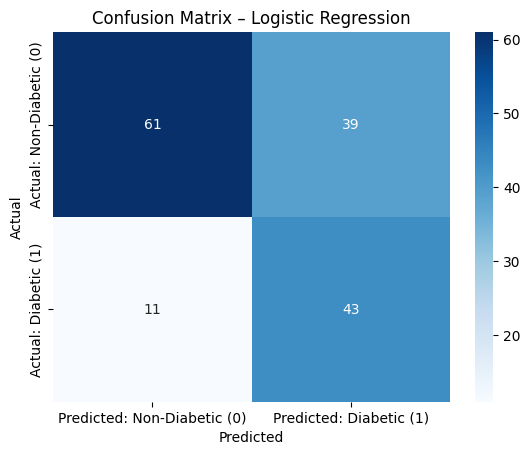

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.title('Confusion Matrix – Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
##X = df2[['Glucose', 'BMI', 'Age', 'Insulin']]
##y = df2['Outcome']


input_data = (81,25,27,35)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
